<a href="https://colab.research.google.com/github/maguid28/EE6041-TAandNLP/blob/main/Sentiment_With_Textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Sample data for demonstration
texts = ["I love this product", "This is a terrible product", "I feel great about this", "I hate this thing", "This is not good"]
labels = [1, 0, 1, 0, 0]  # Positive sentiment as 1, negative as 0

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorizing text
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

#Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectors, y_train)

#prediction
y_pred = nb_classifier.predict(X_test_vectors)

#metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

text = "I really like this new song"
blob = TextBlob(text)
sentiment = blob.sentiment

(accuracy, precision, recall, f1, sentiment)

(1.0,
 1.0,
 1.0,
 1.0,
 Sentiment(polarity=0.16818181818181818, subjectivity=0.32727272727272727))

In [ ]:
from textblob import TextBlob

texts = [
    "I love this product",
    "This is a terrible product",
    "I feel great about this",
    "I hate this thing",
    "This is not good"
]

sentiments = []
for text in texts:
    blob = TextBlob(text)
    sentiment = blob.sentiment
    sentiments.append((text, sentiment[0]))

sentiments

[('I love this product', 0.5),
 ('This is a terrible product', -1.0),
 ('I feel great about this', 0.8),
 ('I hate this thing', -0.8),
 ('This is not good', -0.35)]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels = [1, 0, 1, 0, 0]
actual_labels = [1, 0, 1, 0, 0]

#Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

(accuracy, precision, recall, f1)

(1.0, 1.0, 1.0, 1.0)

# Manually calculating Accuracy, Precision, Recall, and F1 Score

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0

# Count tp tn fp fn
for actual, predicted in zip(actual_labels, predicted_labels):
    if actual == predicted == 1:
        tp += 1
    elif actual == predicted == 0:
        tn += 1
    elif actual == 0 and predicted == 1:
        fp += 1
    elif actual == 1 and predicted == 0:
        fn += 1

accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
precision_manual = tp / (tp + fp) if (tp + fp) != 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) != 0 else 0

(accuracy_manual, precision_manual, recall_manual, f1_manual)

(1.0, 1.0, 1.0, 1.0)

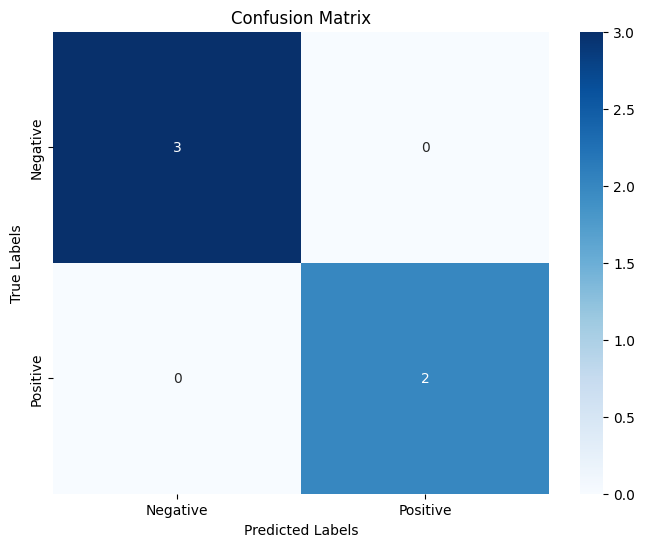

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
